# Classification Metrics

There are a number of metrics that can be used to measure the performance of a classifier

- Accuracy
- Confusion Matrix (tool)
- Precision
- Recall 
- F1 score
- Area under a ROC curve

In [1]:
import os
from pathlib import Path
from matplotlib import pyplot as plt
IMAGES_PATH = Path() / "images" 
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Accuracy (Binary Classification)

In [2]:
import pandas as pd
y_true = [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]
y_pred = [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]

d = {'y_true': y_true, 'y_pred': y_pred}
data_and_pred = pd.DataFrame(data = d)
data_and_pred

,y_true,y_pred
0,1,0
1,1,1
2,0,0
3,1,1
4,1,0
5,0,0
6,1,1
7,1,0
8,0,0
9,0,1


In [3]:
match_df = data_and_pred[data_and_pred['y_true'] == data_and_pred['y_pred']]
match_df

,y_true,y_pred
1,1,1
2,0,0
3,1,1
5,0,0
6,1,1
8,0,0
10,0,0


In [4]:
print ('Accuracy = ', len(match_df)/len(data_and_pred))

Accuracy =  0.6363636363636364


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)


0.6363636363636364

In [6]:
print ('Accuracy = ', accuracy_score(y_true, y_pred))

Accuracy =  0.6363636363636364


# Accuracy (Multi class Classification)

In [7]:
y_true = ['cat', 'dog', 'mouse', 'cat', 'cat', 'mouse', 'mouse', 'dog', 'dog']
y_pred = ['cat', 'cat', 'mouse', 'cat', 'cat', 'cat', 'mouse', 'dog', 'mouse']

d = {'y_true': y_true, 'y_pred': y_pred}
animals = pd.DataFrame(data = d)
animals

,y_true,y_pred
0,cat,cat
1,dog,cat
2,mouse,mouse
3,cat,cat
4,cat,cat
5,mouse,cat
6,mouse,mouse
7,dog,dog
8,dog,mouse


In [8]:
match_df = animals[animals['y_true'] == animals['y_pred']]
match_df

,y_true,y_pred
0,cat,cat
2,mouse,mouse
3,cat,cat
4,cat,cat
6,mouse,mouse
7,dog,dog


In [9]:
print('Accuracy: ', len(match_df)/len(animals))

Accuracy:  0.6666666666666666


In [10]:
print('Accuracy: ', "{:.2f}".format(len(match_df)/len(animals)))

Accuracy:  0.67


In [11]:
print('Accuracy: ', accuracy_score(y_true, y_pred))

Accuracy:  0.6666666666666666


In [12]:
print('Accuracy: ', "{:.2f}".format(accuracy_score(y_true, y_pred)))

Accuracy:  0.67


# Confusion Matrix (Binary Classification)

In [13]:
y_true = [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]
y_pred = [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]

d = {'y_true': y_true, 'y_pred': y_pred}
data_and_pred = pd.DataFrame(data = d)
data_and_pred

,y_true,y_pred
0,1,0
1,1,1
2,0,0
3,1,1
4,1,0
5,0,0
6,1,1
7,1,0
8,0,0
9,0,1


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[4, 1],
       [3, 3]], dtype=int64)

In [15]:
pd.DataFrame(confusion_matrix(y_true, y_pred))

,0,1
0,4,1
1,3,3


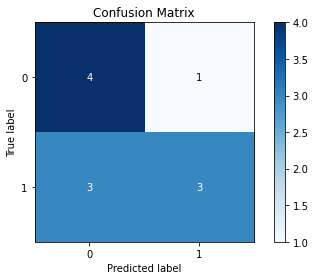

In [16]:
#!pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true, y_pred);
save_fig('Confusion Matrix for Binary Classification')

# Confusion Matrix (Multi class Classification)

In [17]:
y_true = ['cat', 'dog', 'mouse', 'cat', 'cat', 'mouse', 'mouse', 'dog', 'dog']
y_pred = ['cat', 'cat', 'mouse', 'cat', 'cat', 'cat', 'mouse', 'dog', 'mouse']

d = {'y_true': y_true, 'y_pred': y_pred}
animals = pd.DataFrame(data = d)
animals

,y_true,y_pred
0,cat,cat
1,dog,cat
2,mouse,mouse
3,cat,cat
4,cat,cat
5,mouse,cat
6,mouse,mouse
7,dog,dog
8,dog,mouse


In [18]:
pd.DataFrame(confusion_matrix(y_true, y_pred))

,0,1,2
0,3,0,0
1,1,1,1
2,1,0,2


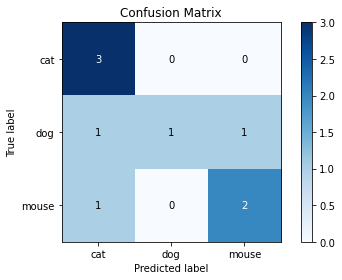

In [19]:
skplt.metrics.plot_confusion_matrix(y_true, y_pred);
save_fig('Confusion Matrix for Multi Class Classification')

# Precision, Recall, F1 Score (Binary classification)

In [20]:
y_true = [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0]
y_pred = [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0]

d = {'y_true': y_true, 'y_pred': y_pred}
data_and_pred = pd.DataFrame(data = d)
data_and_pred

,y_true,y_pred
0,1,0
1,1,1
2,0,0
3,1,1
4,1,0
5,0,0
6,1,1
7,1,0
8,0,0
9,0,1


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.75      0.50      0.60         6

    accuracy                           0.64        11
   macro avg       0.66      0.65      0.63        11
weighted avg       0.67      0.64      0.63        11



# Precision, Recall, F1 Score (Multi class classification)

In [22]:
y_true = ['cat', 'dog', 'mouse', 'cat', 'cat', 'mouse', 'mouse', 'dog', 'dog']
y_pred = ['cat', 'cat', 'mouse', 'cat', 'cat', 'cat', 'mouse', 'dog', 'mouse']

d = {'y_true': y_true, 'y_pred': y_pred}
animals = pd.DataFrame(data = d)
animals

,y_true,y_pred
0,cat,cat
1,dog,cat
2,mouse,mouse
3,cat,cat
4,cat,cat
5,mouse,cat
6,mouse,mouse
7,dog,dog
8,dog,mouse


In [23]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         cat       0.60      1.00      0.75         3
         dog       1.00      0.33      0.50         3
       mouse       0.67      0.67      0.67         3

    accuracy                           0.67         9
   macro avg       0.76      0.67      0.64         9
weighted avg       0.76      0.67      0.64         9

